In [2]:
import matplotlib.pyplot as plt
import json
import pandas
import numpy as np
import glob
import math
import os

In [3]:
pythia69b_results_dir = "pythia69b"
pythia12b_results_dir = "pythia12b"
pythia28b_results_dir = "pythia28b"
pythia1b_results_dir = "pythia1b"
pythia410m_results_dir = "pythia410m"
pythia160m_results_dir = "pythia160m"


In [4]:
combined_results = {}

combined_results[6.9] = {}
combined_results[2.8] = {}
combined_results[12] = {}
combined_results[1] = {}
combined_results[0.41] = {}
combined_results[0.16] = {}


for path in glob.glob(os.path.join(pythia69b_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[6.9][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia12b_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[12][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia28b_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[2.8][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia1b_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[1][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia410m_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[0.41][dataset_name] = json.load(f)


for path in glob.glob(os.path.join(pythia160m_results_dir,"*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_results[0.16][dataset_name] = json.load(f)



In [5]:
CB_color_cycle = ['#377eb8', '#4daf4a','#f781bf',
                '#a65628','#ff7f00', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [6]:
dataset_order = ["wiki", "pubmedc", "pilecc", "uspto", "github"]
dataset_naming_dict = {
    "wiki": "Wikipedia",
    "pubmedc": "PubMed Central",
    "uspto": "USPTO",
    "pilecc": "Pile-CC", 
    "github": "Github"
}

In [7]:
def plot_mia_across_model_sizes_loss_traces(combined_results, metric_to_plot, metric="AUC", color=CB_color_cycle):

    # Get dataset names from first model size entry
    first_model_size = next(iter(combined_results))
    # dataset_names = list(combined_results[first_model_size].keys())
    dataset_names = [d for d in dataset_order if d in combined_results[first_model_size]]

    n_datasets = len(dataset_names)
    ncols = 3
    nrows = math.ceil(n_datasets / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
    axes = axes.flatten()

    if n_datasets == 1:
        axes = [axes]

    for ax, dataset_name in zip(axes, dataset_names):
        seq_len_dict = {}  # {seq_len: {model_size: auc_value}}

        # Collect data for this dataset across model sizes
        for model_size, datasets in combined_results.items():
            if dataset_name not in datasets:
                continue  # skip if model doesn't have this dataset
            auc_data = datasets[dataset_name][metric].get(metric_to_plot)
            if auc_data is None:
                continue  # skip if metric is missing
            for seq_len, auc_val in auc_data.items():
                seq_len_dict.setdefault(seq_len, {})[model_size] = auc_val

        # Plot each sequence length line
        for i, (seq_len, model_dict) in enumerate(sorted(seq_len_dict.items(), key=lambda x: int(x[0].split("=")[1]))):
            model_sizes_sorted = sorted(model_dict.keys())
            auc_values_sorted = [model_dict[m] for m in model_sizes_sorted]
            ax.plot(model_sizes_sorted, auc_values_sorted, marker="o", label=seq_len, color=color[i % len(color)])

        ax.set_title(dataset_naming_dict[dataset_name], fontsize=16)
        ax.set_xlabel("Model size (B parameters)", fontsize=16)
        ax.set_ylabel(metric, fontsize=16)
        ax.tick_params(axis='both', labelsize=16)
        ax.grid(True)
        ax.legend(fontsize="medium", loc='lower right')

    if n_datasets < len(axes):
        axes[-1].axis('off')

    plt.tight_layout()
    # plt.suptitle(f"{metric} vs Model Size for {metric_to_plot.upper()} on loss traces", fontsize=16, y=1.02)
    plt.show()

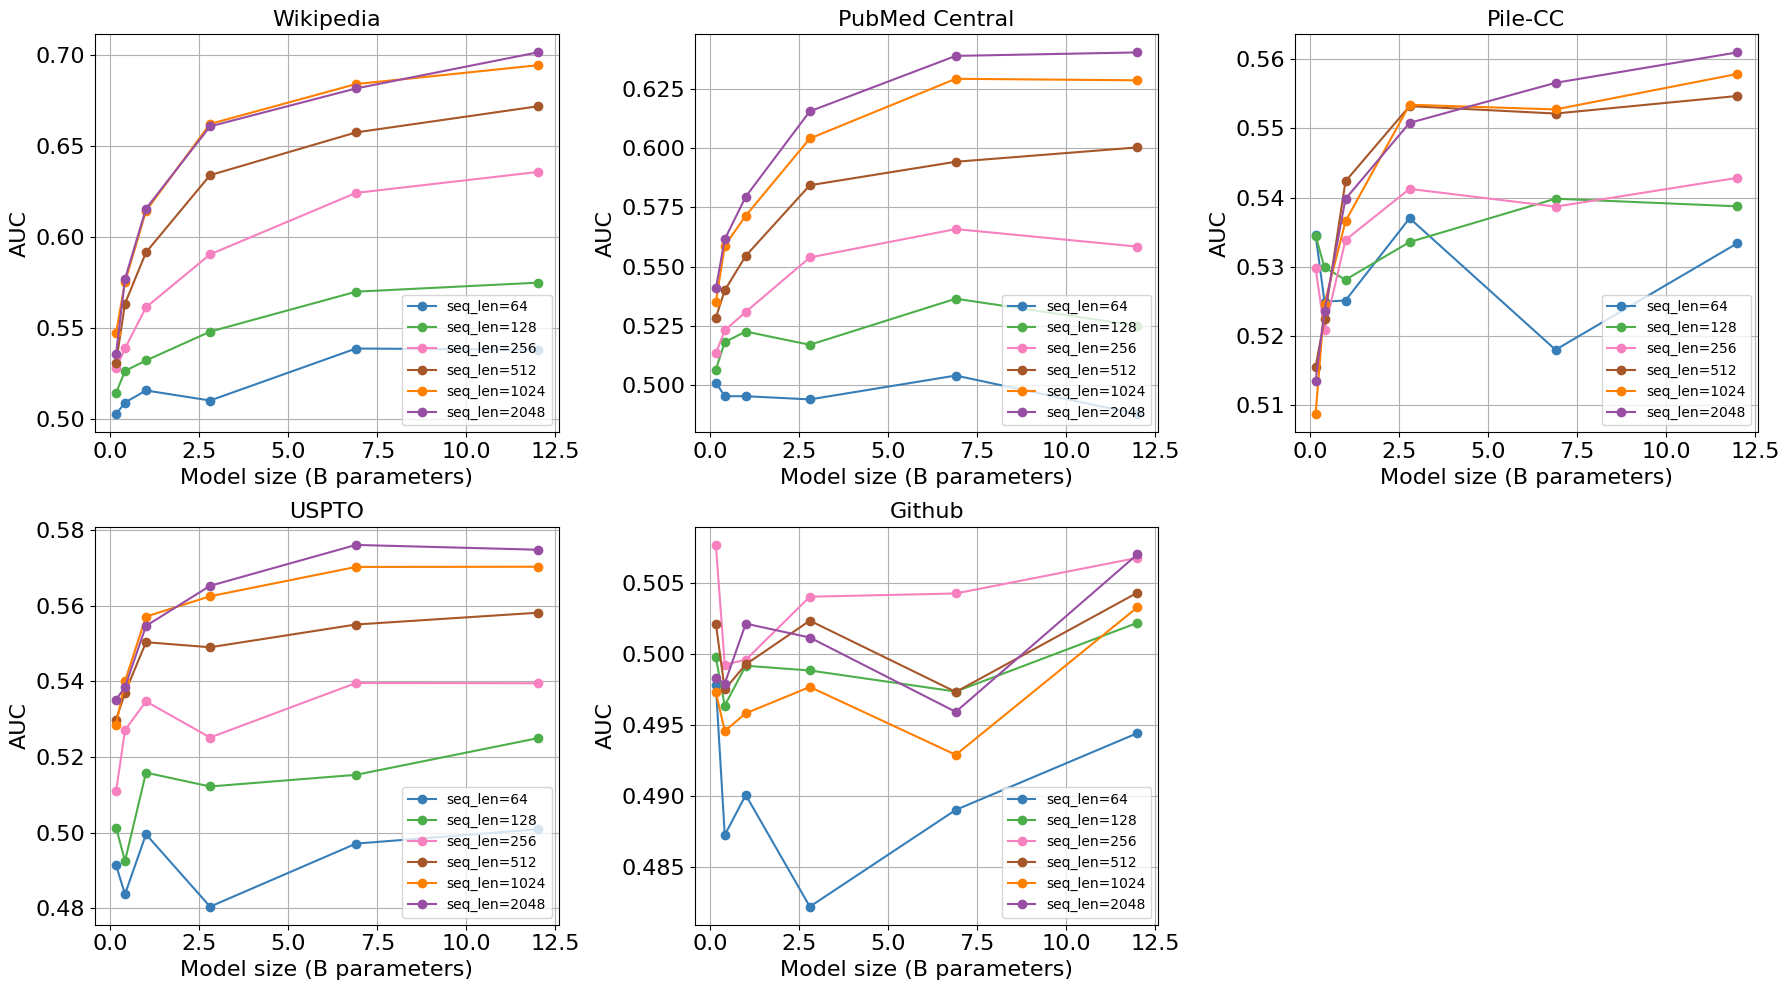

In [8]:
plot_mia_across_model_sizes_loss_traces(combined_results, 'clfa', 'AUC')

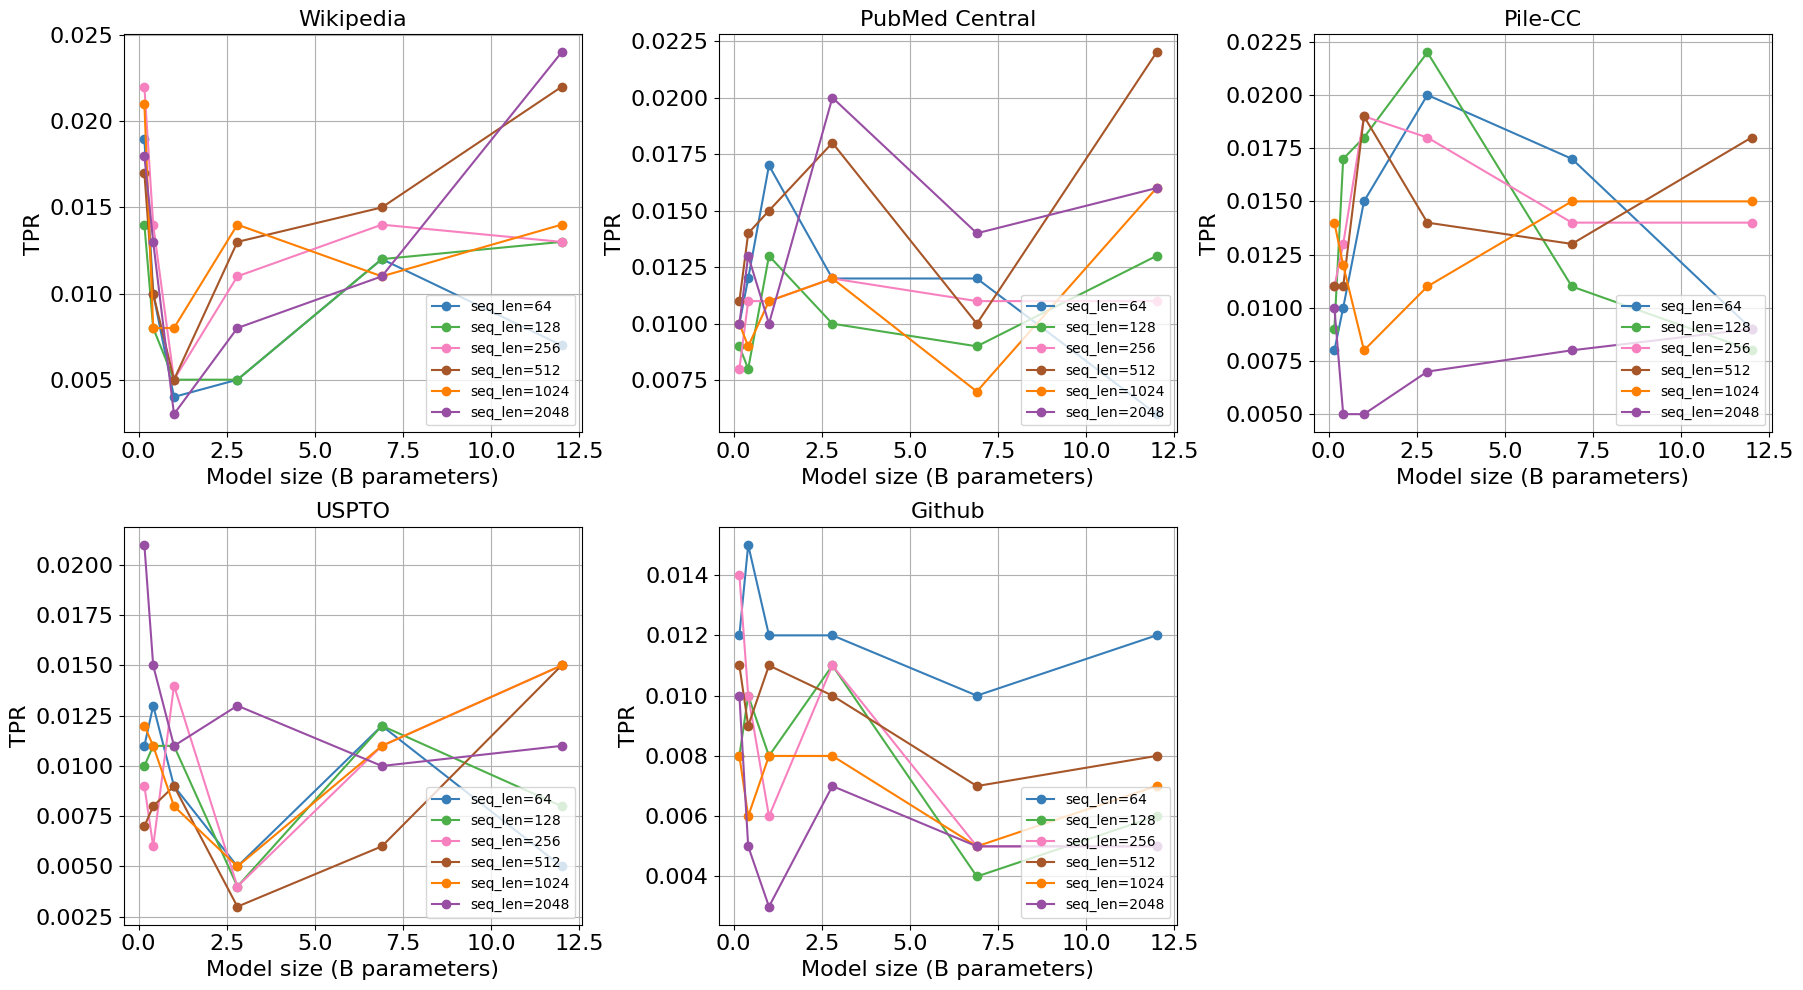

In [9]:
plot_mia_across_model_sizes_loss_traces(combined_results, 'clfa', 'TPR')

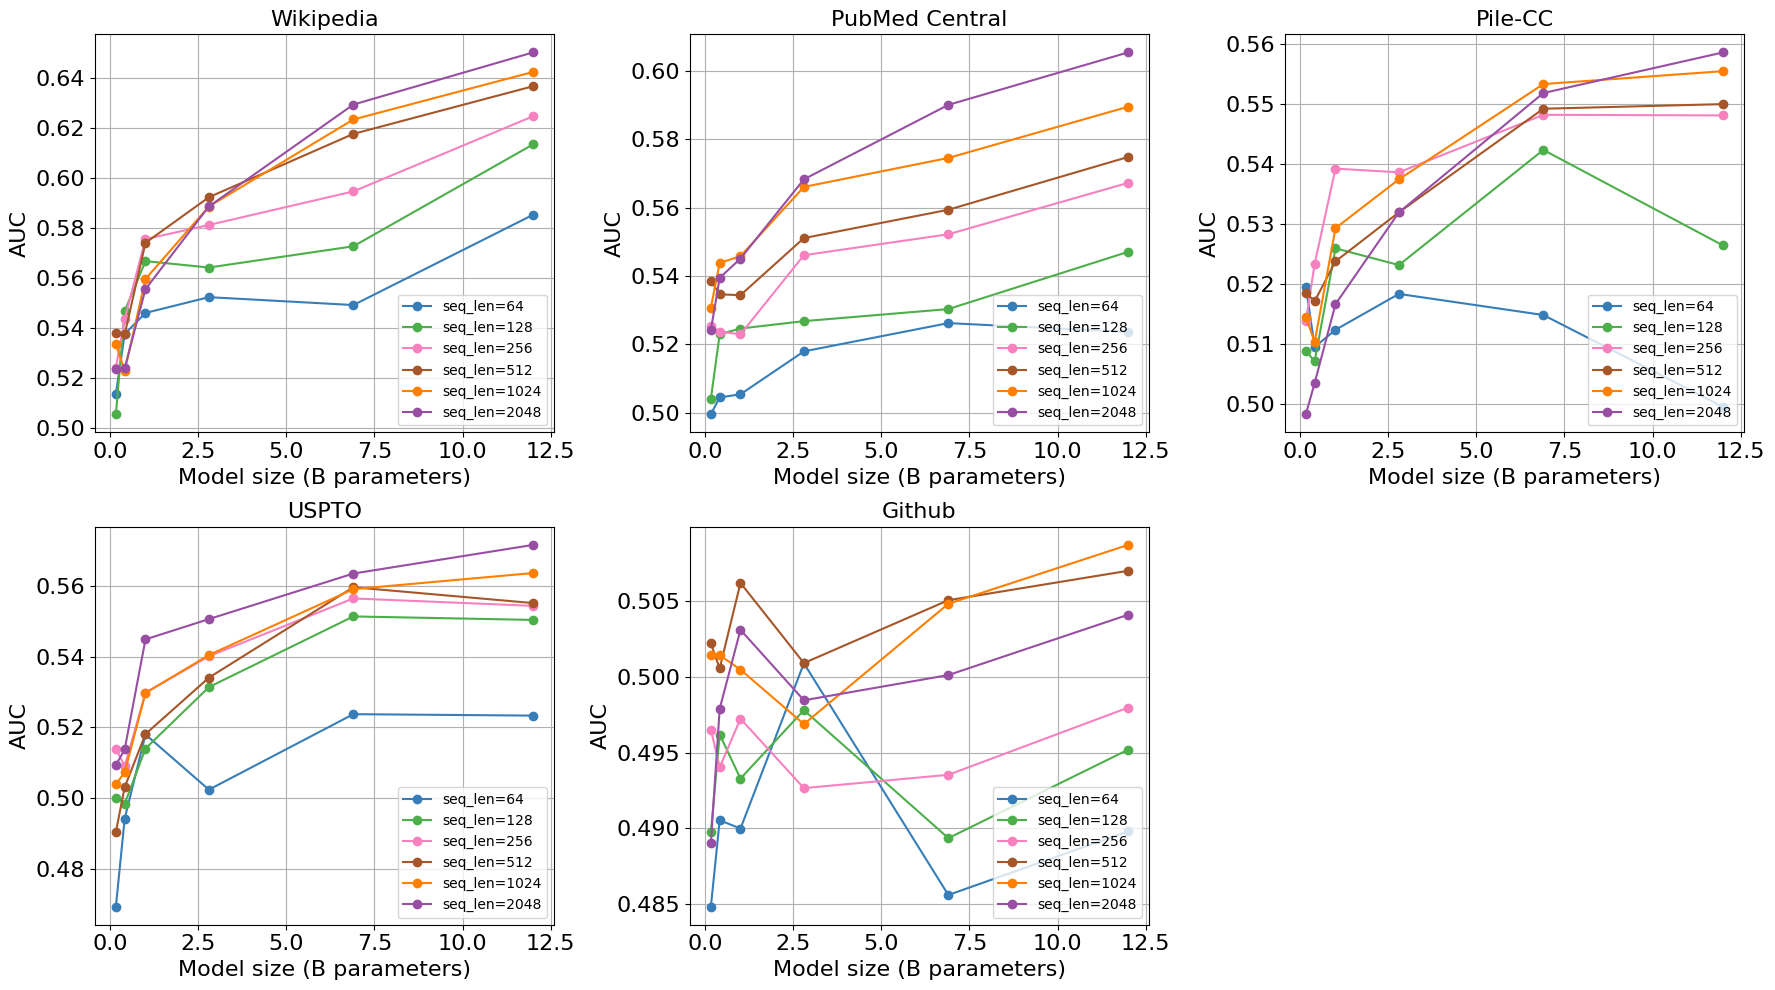

In [10]:
plot_mia_across_model_sizes_loss_traces(combined_results, 'ltiqr', 'AUC')

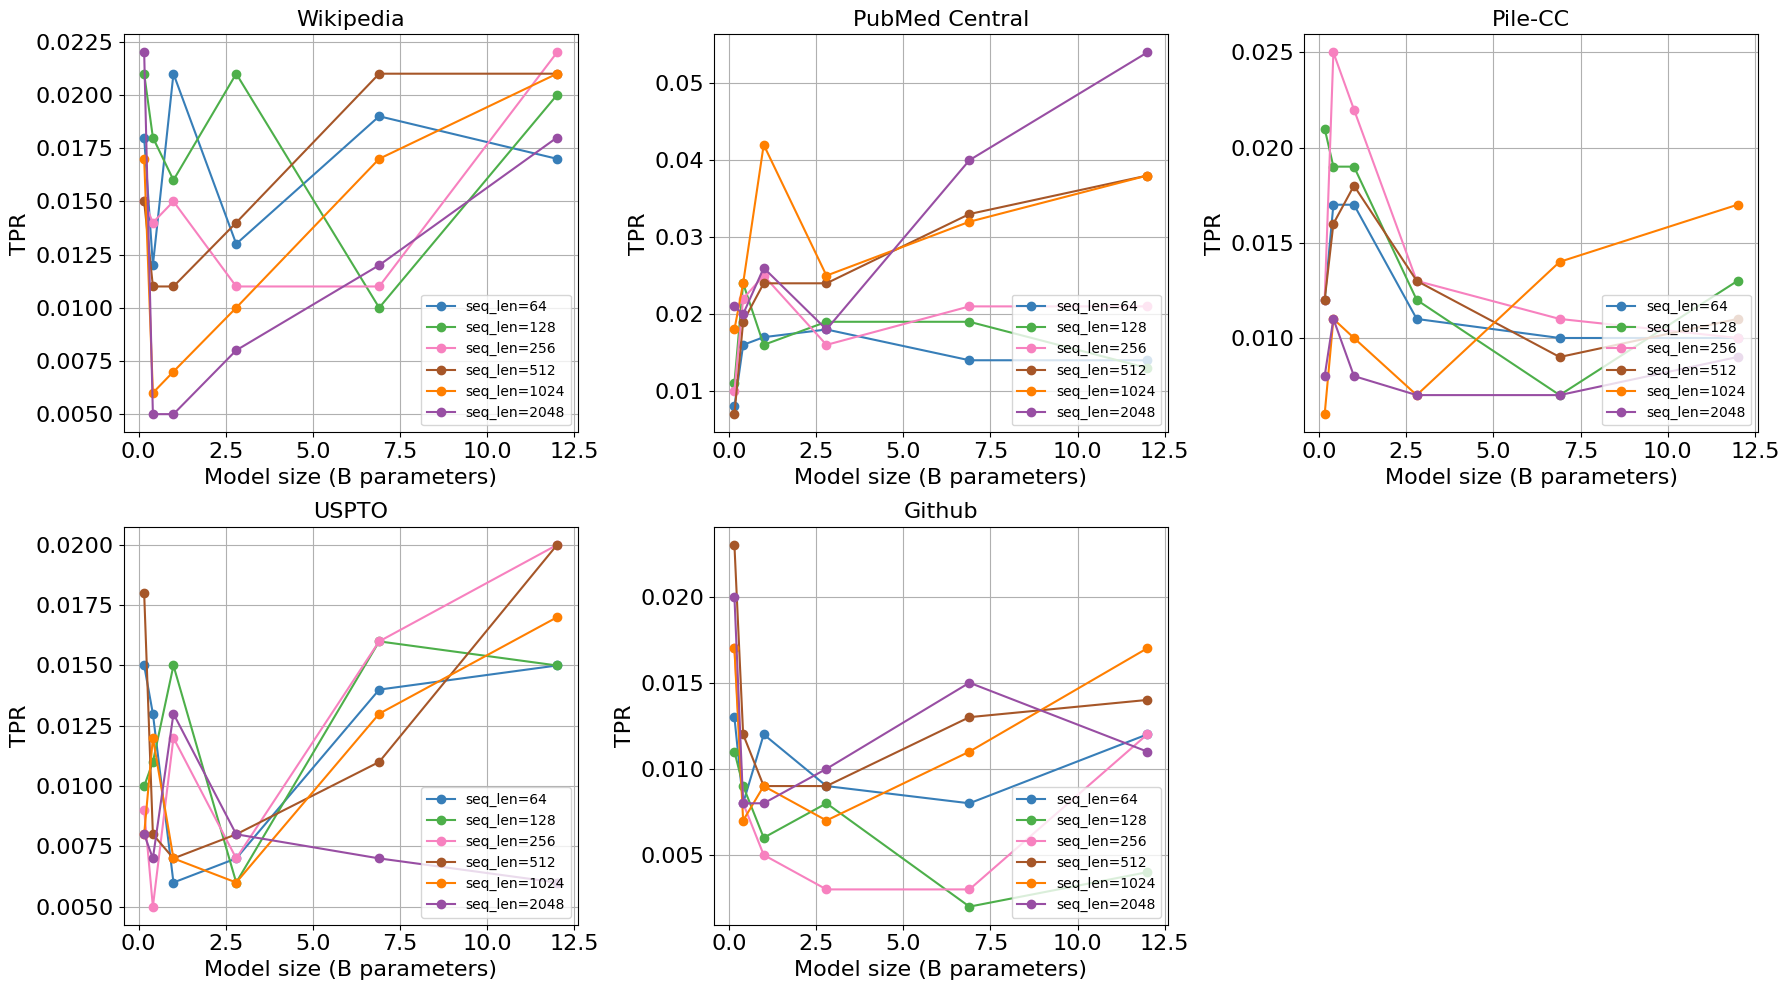

In [11]:
plot_mia_across_model_sizes_loss_traces(combined_results, 'ltiqr', 'TPR')

### Normalised Loss Traces

In [12]:
combined_norm_results = {}

combined_norm_results[6.9] = {}
combined_norm_results[2.8] = {}
combined_norm_results[12] = {}
combined_norm_results[1] = {}
combined_norm_results[0.41] = {}
combined_norm_results[0.16] = {}


for path in glob.glob(os.path.join(pythia69b_results_dir,"normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[6.9][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia12b_results_dir, "normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[12][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia28b_results_dir, "normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[2.8][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia1b_results_dir, "normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[1][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia410m_results_dir, "normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[0.41][dataset_name] = json.load(f)

for path in glob.glob(os.path.join(pythia160m_results_dir, "normalised", "*")):
    if os.path.isfile(path):
        dataset_name = path.split("/")[-1].split("_")[0]
        with open(path, "r") as f:
            combined_norm_results[0.16][dataset_name] = json.load(f)

In [13]:
def plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, metric_to_plot='clfa', metric="AUC", color=CB_color_cycle):

    # Get dataset names from first model size entry
    first_model_size = next(iter(combined_norm_results))
    # dataset_names = list(combined_norm_results[first_model_size].keys())
    dataset_names = [d for d in dataset_order if d in combined_results[first_model_size]]

    n_datasets = len(dataset_names)
    ncols = 3
    nrows = math.ceil(n_datasets / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
    axes = axes.flatten()

    if n_datasets == 1:
        axes = [axes]

    for ax, dataset_name in zip(axes, dataset_names):
        seq_len_dict = {}  # {seq_len: {model_size: auc_value}}

        # Collect data for this dataset across model sizes
        for model_size, datasets in combined_norm_results.items():
            if dataset_name not in datasets:
                continue  # skip if model doesn't have this dataset
            auc_data = datasets[dataset_name][metric].get(metric_to_plot)
            if auc_data is None:
                continue  # skip if metric is missing
            for seq_len, auc_val in auc_data.items():
                seq_len_dict.setdefault(seq_len, {})[model_size] = auc_val

        # Plot each sequence length line
        for i, (seq_len, model_dict) in enumerate(sorted(seq_len_dict.items(), key=lambda x: int(x[0].split("=")[1]))):
            model_sizes_sorted = sorted(model_dict.keys())
            auc_values_sorted = [model_dict[m] for m in model_sizes_sorted]
            ax.plot(model_sizes_sorted, auc_values_sorted, marker="o", label=seq_len, color=color[i % len(color)])

        ax.set_title(dataset_naming_dict[dataset_name], fontsize=16)
        ax.set_xlabel("Model size (B parameters)",  fontsize=16)
        ax.set_ylabel(metric, fontsize=16)
        ax.tick_params(axis='both', labelsize=16)
        ax.grid(True)
        ax.legend(fontsize="medium", loc = "upper left")

    if n_datasets < len(axes):
        axes[-1].axis('off')

    plt.tight_layout()
    # plt.suptitle(f"{metric} vs Model Size for {metric_to_plot.upper()} Metric on Normalised Loss Traces", fontsize=16, y=1.02)
    plt.show()

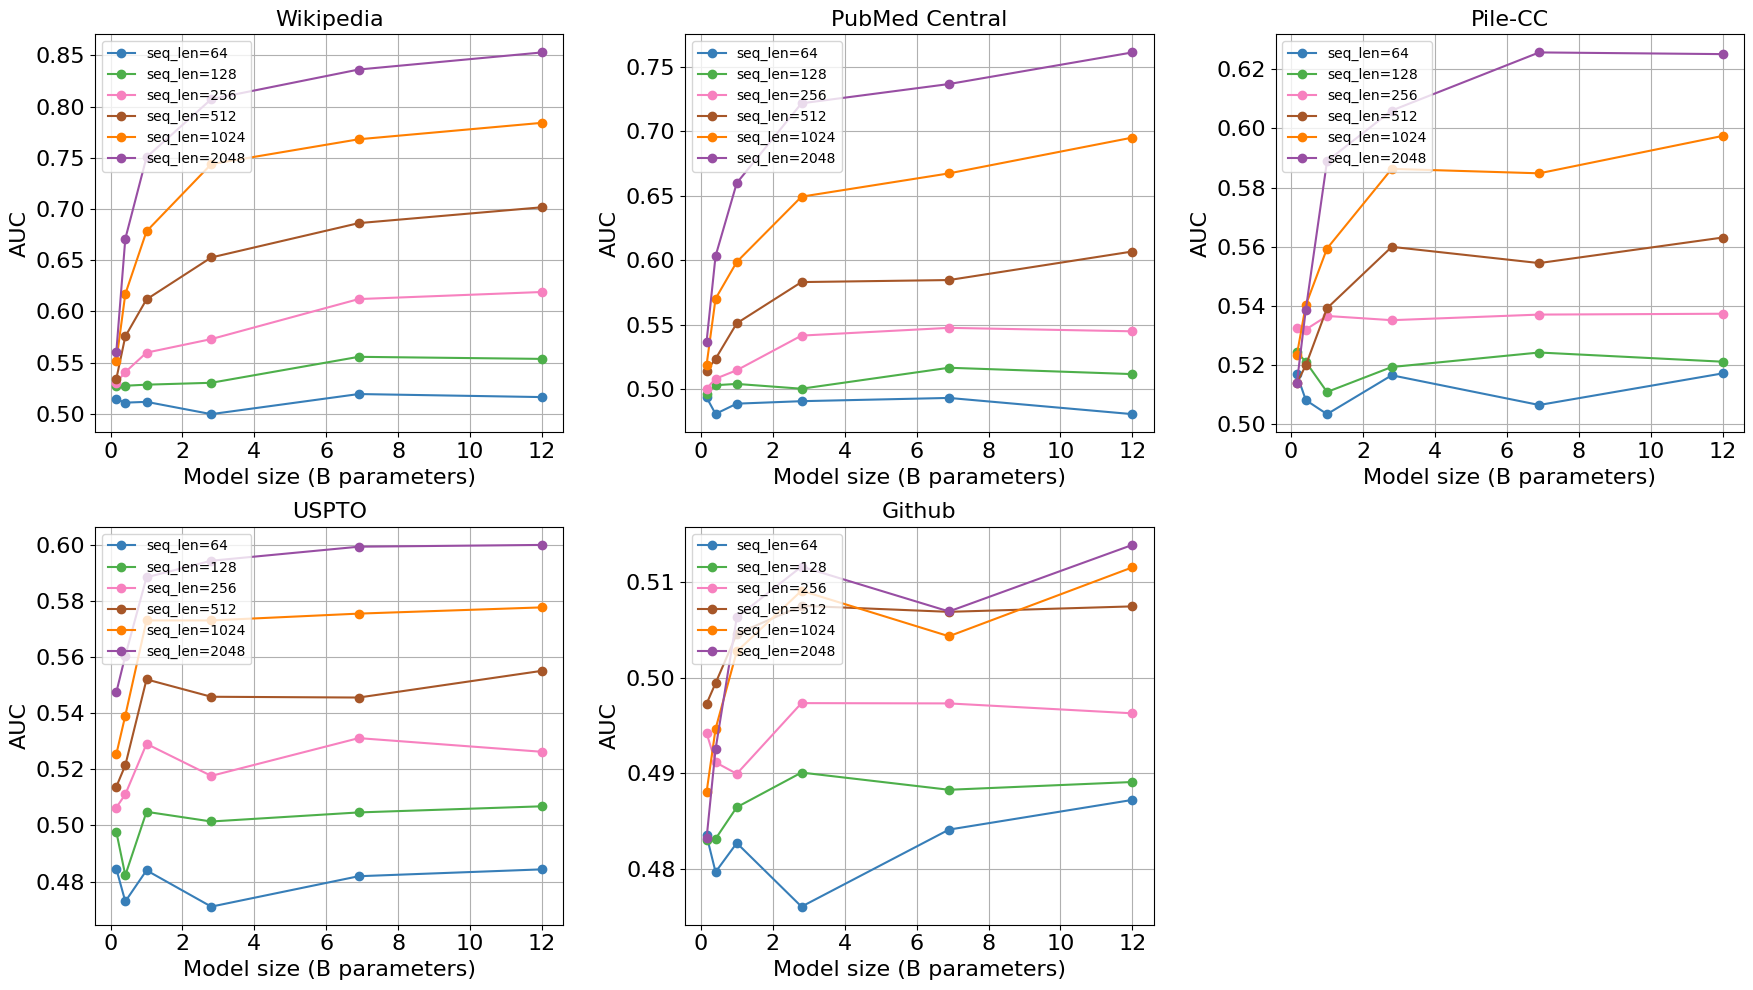

In [14]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results)

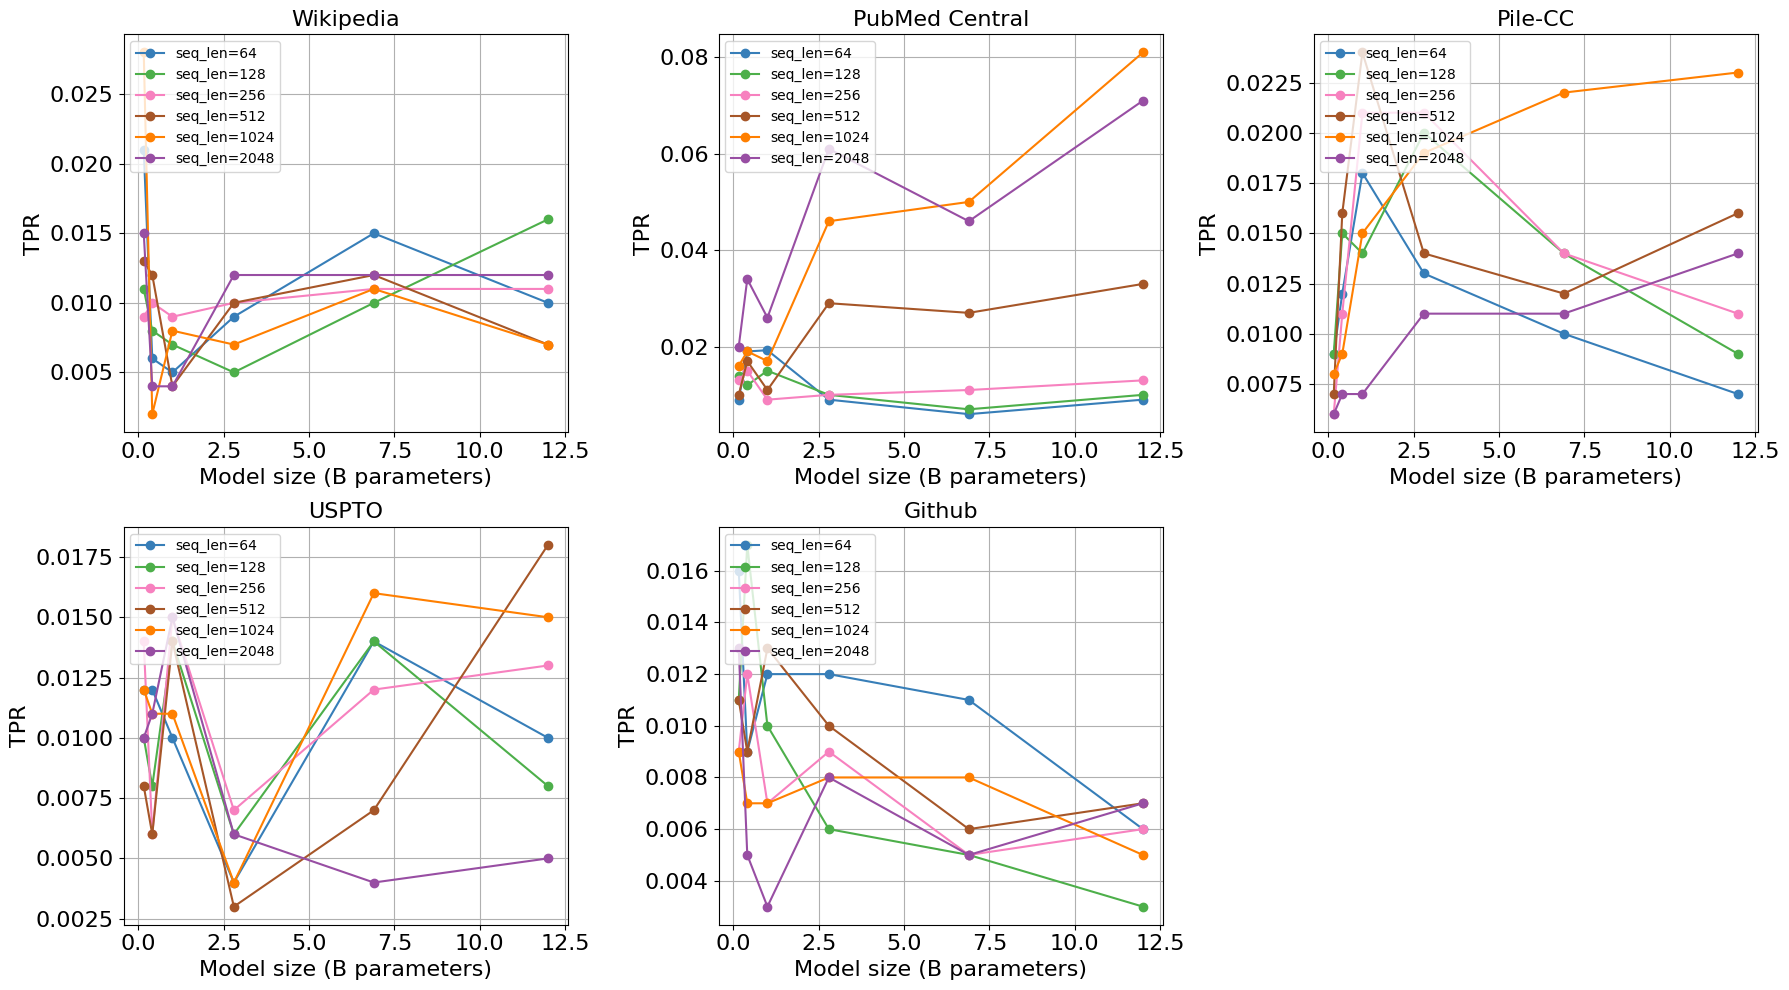

In [15]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'clfa', 'TPR')

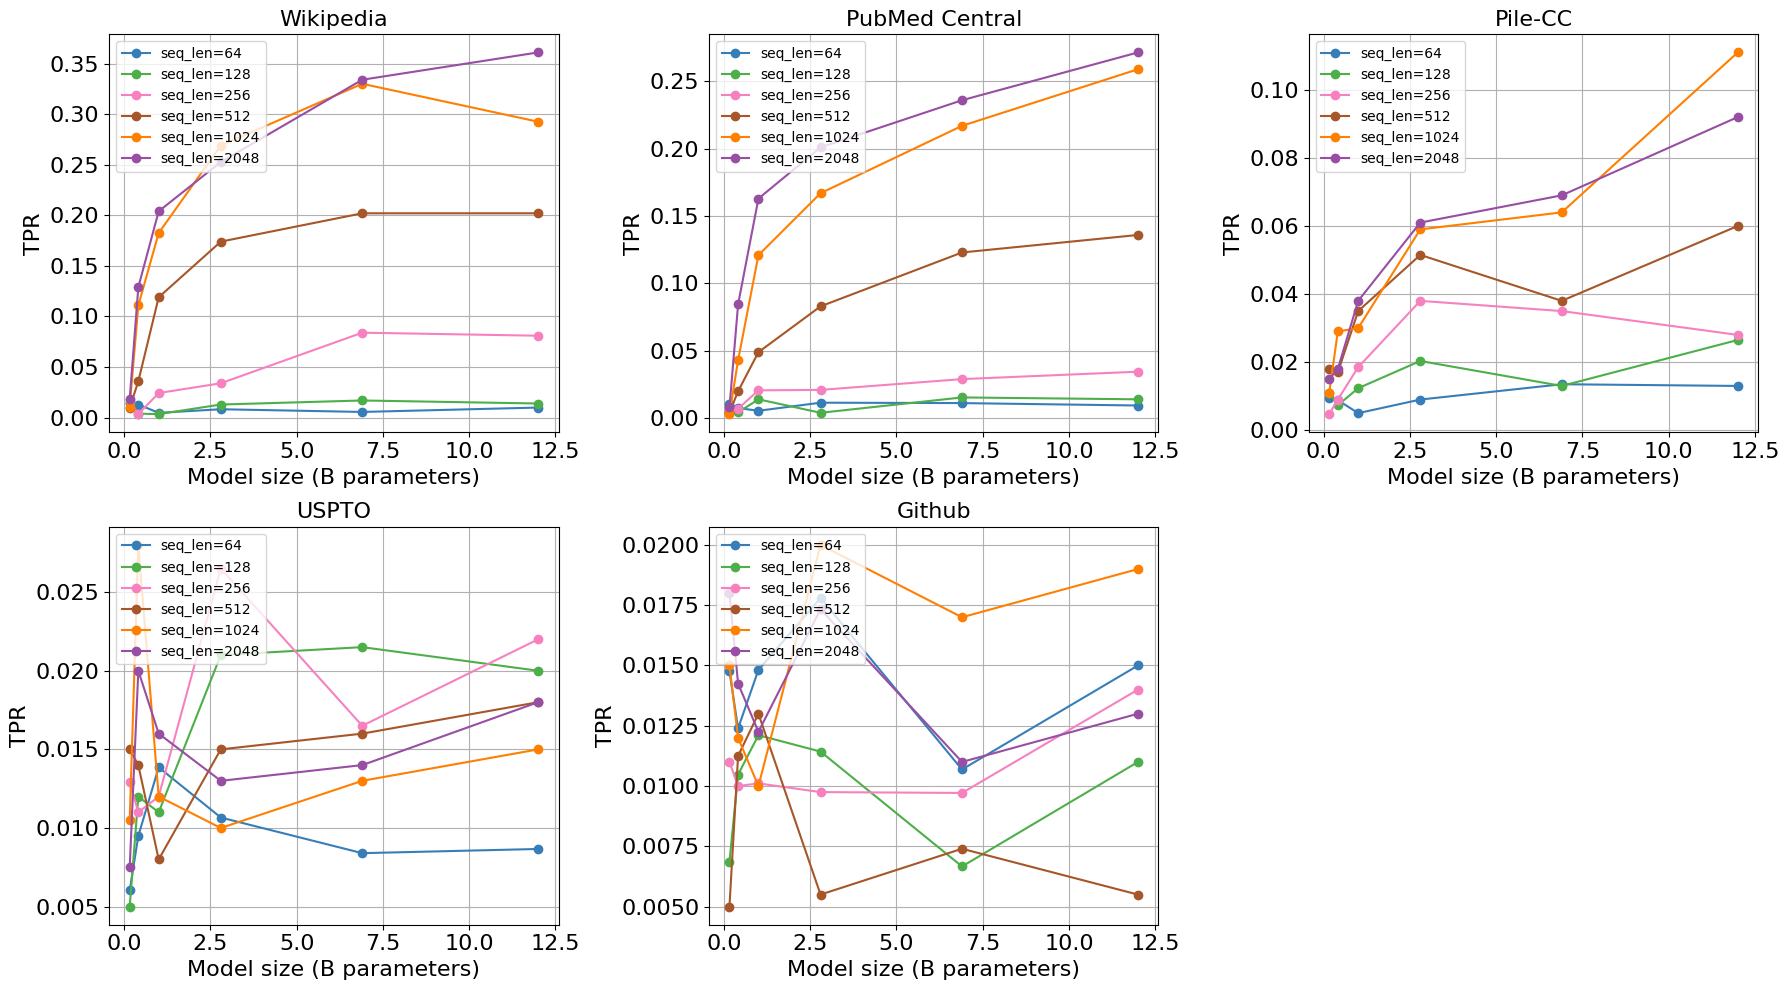

In [16]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 's2conv', 'TPR')

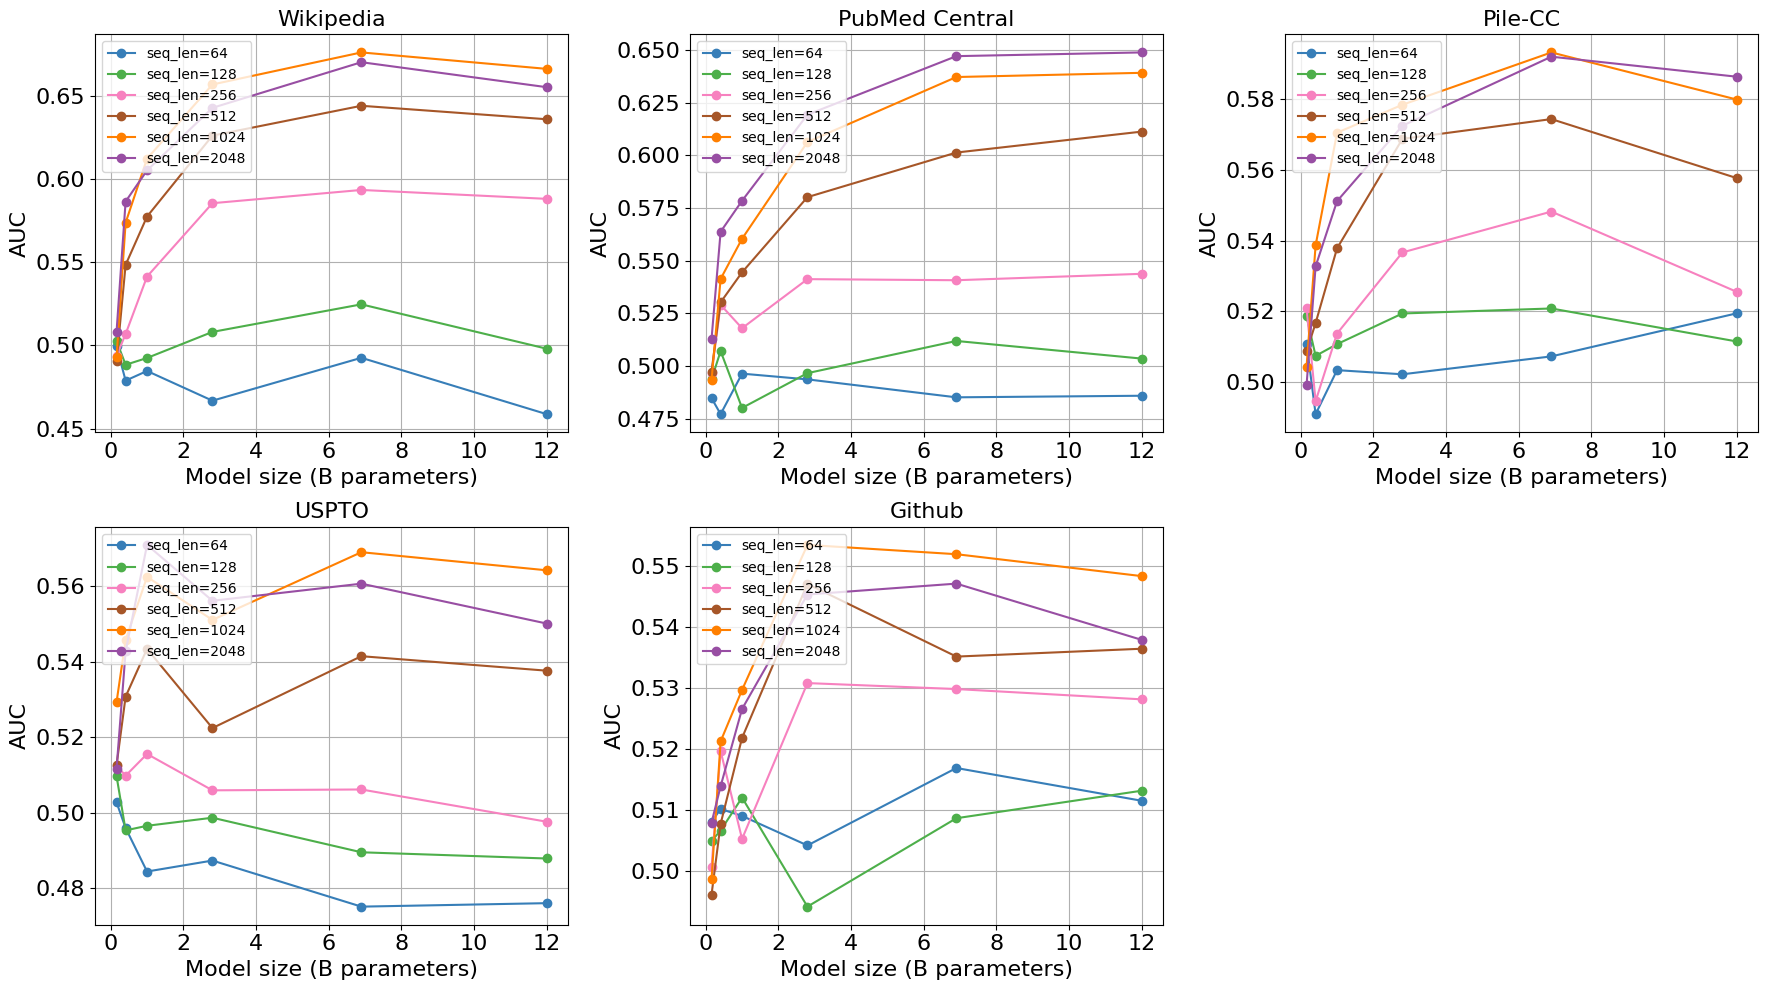

In [17]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 's2conv')

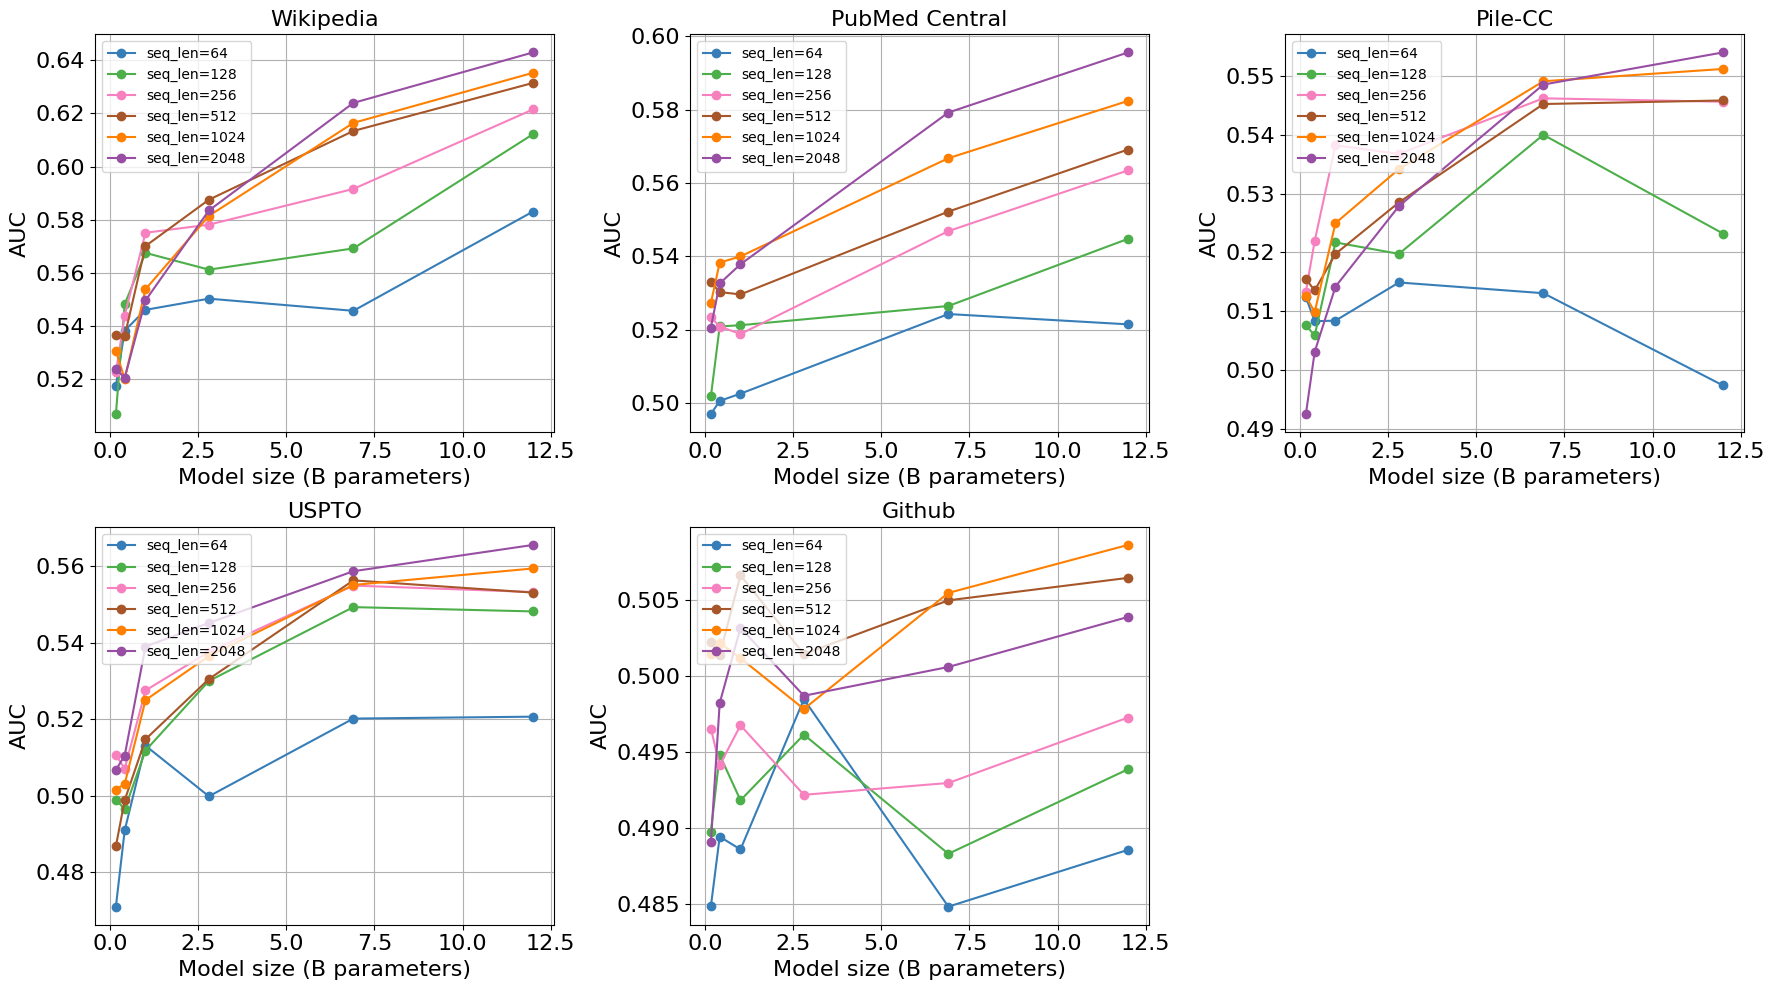

In [18]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltiqr')

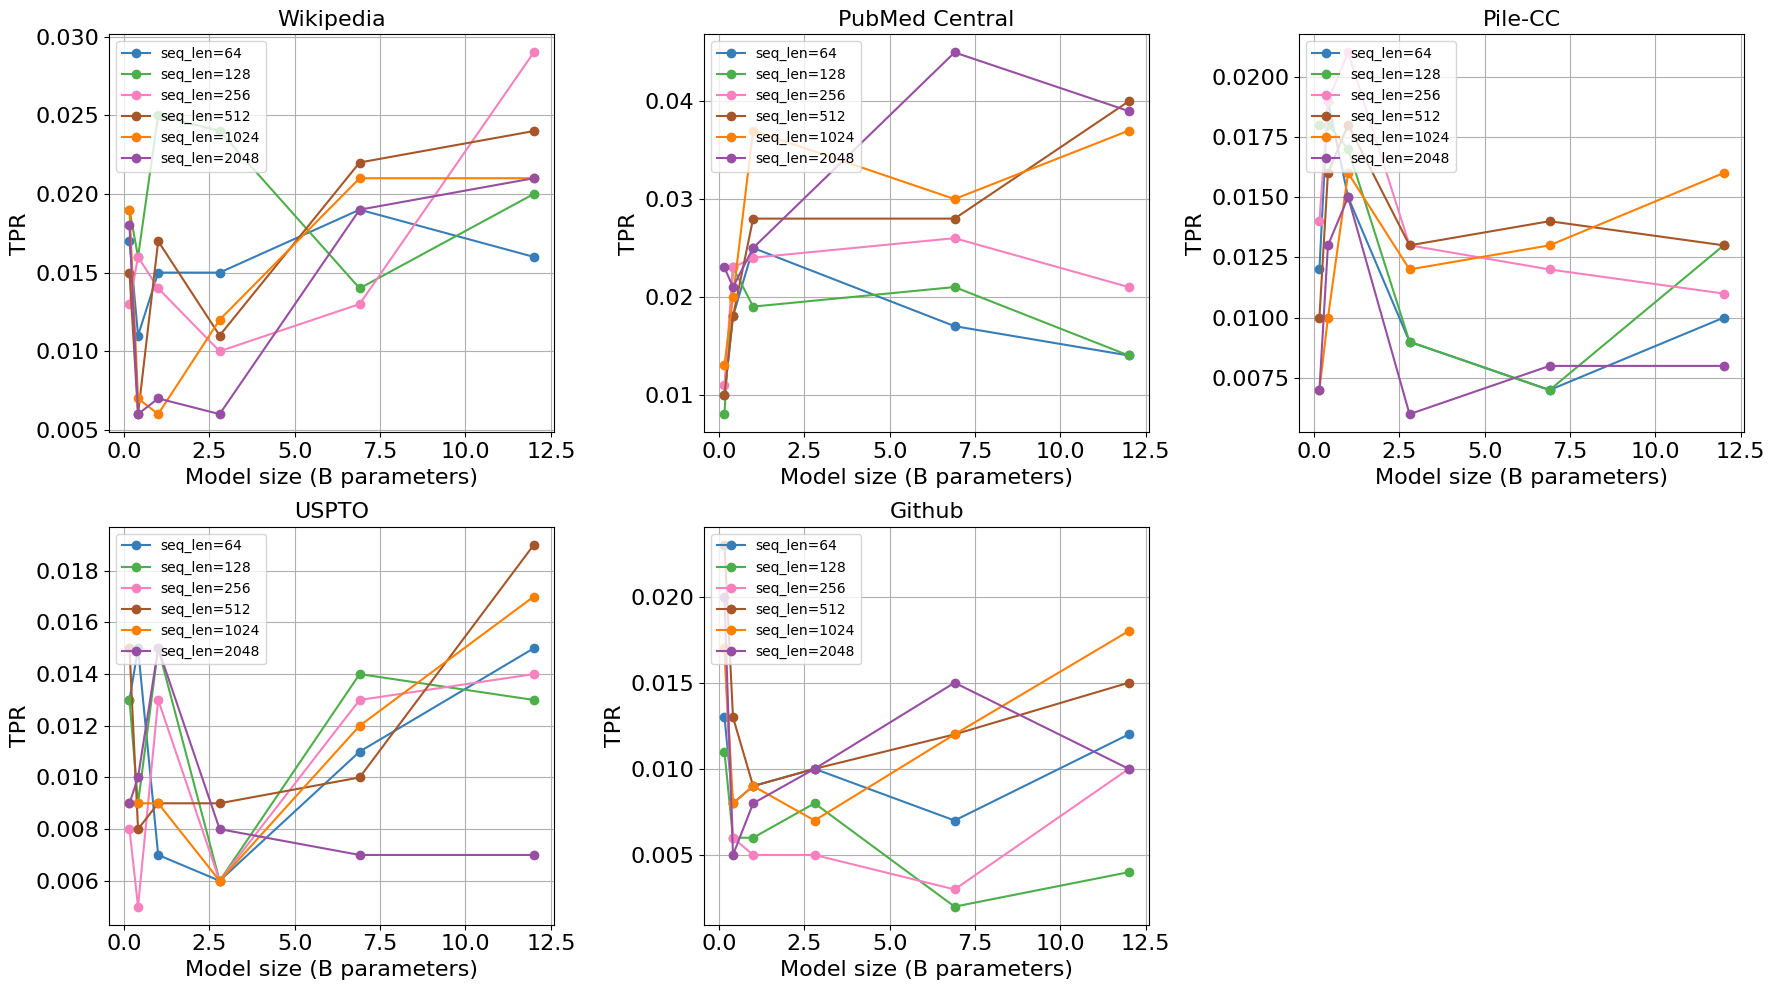

In [19]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltiqr', 'TPR')

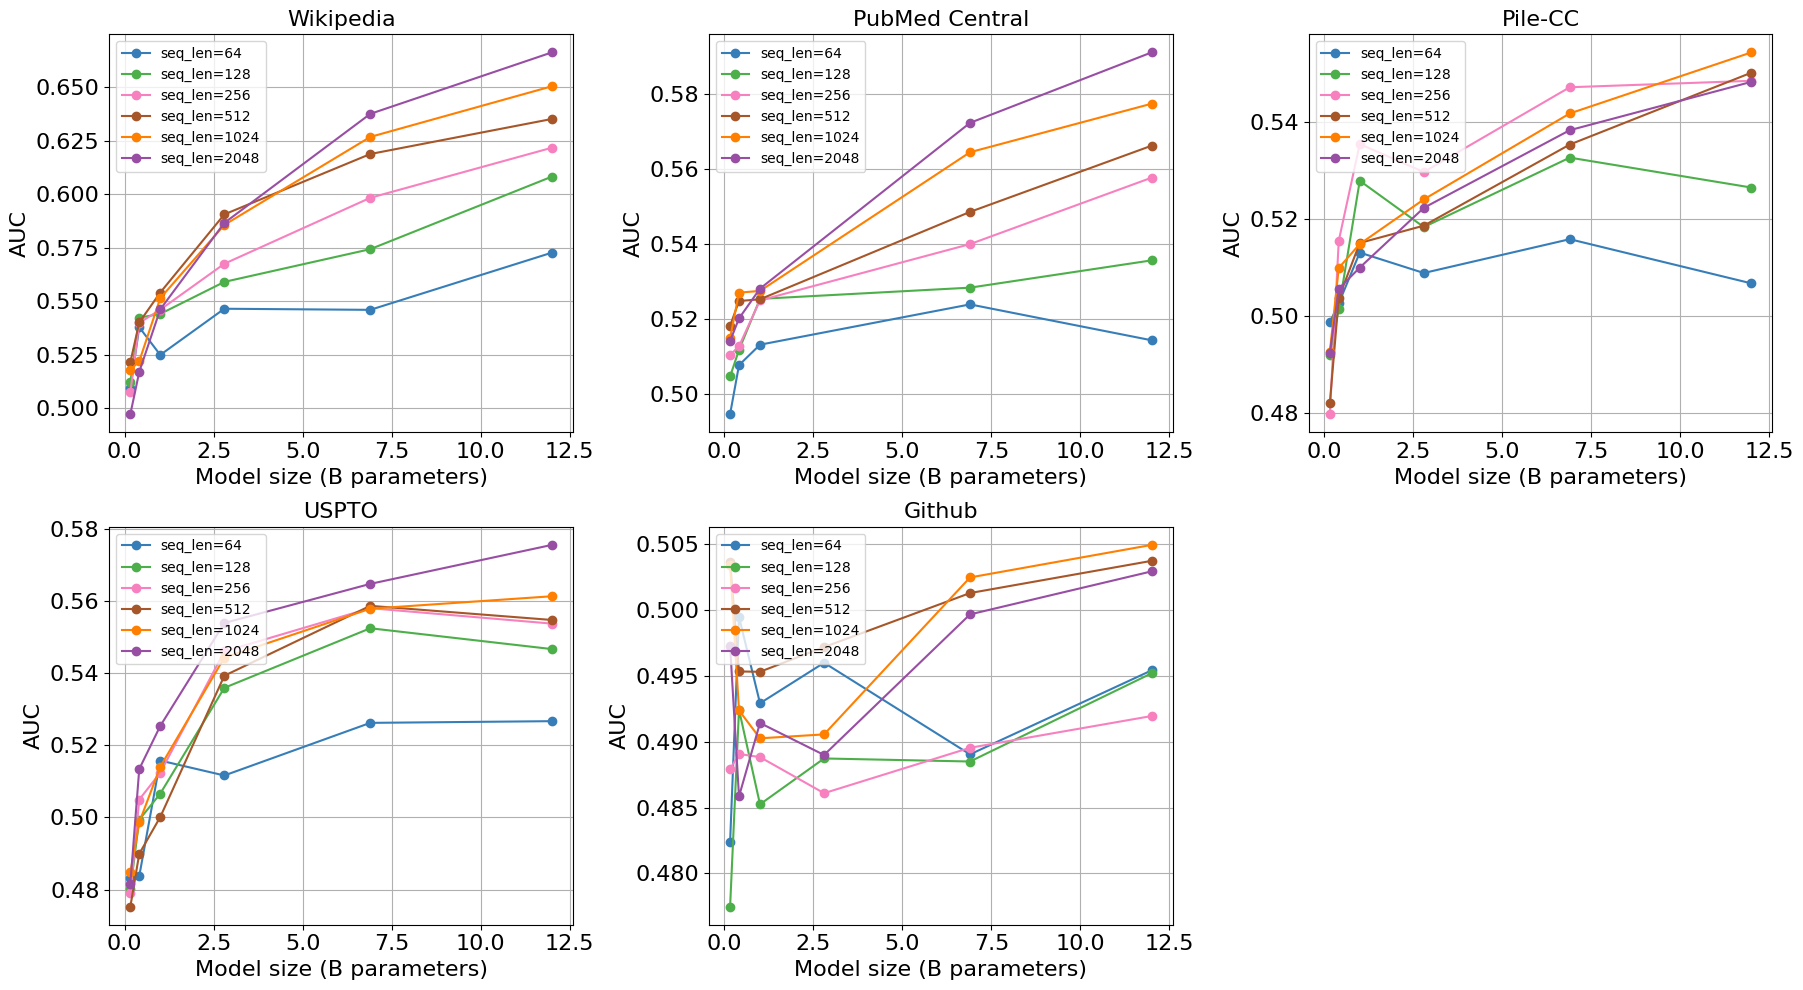

In [20]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltmean')

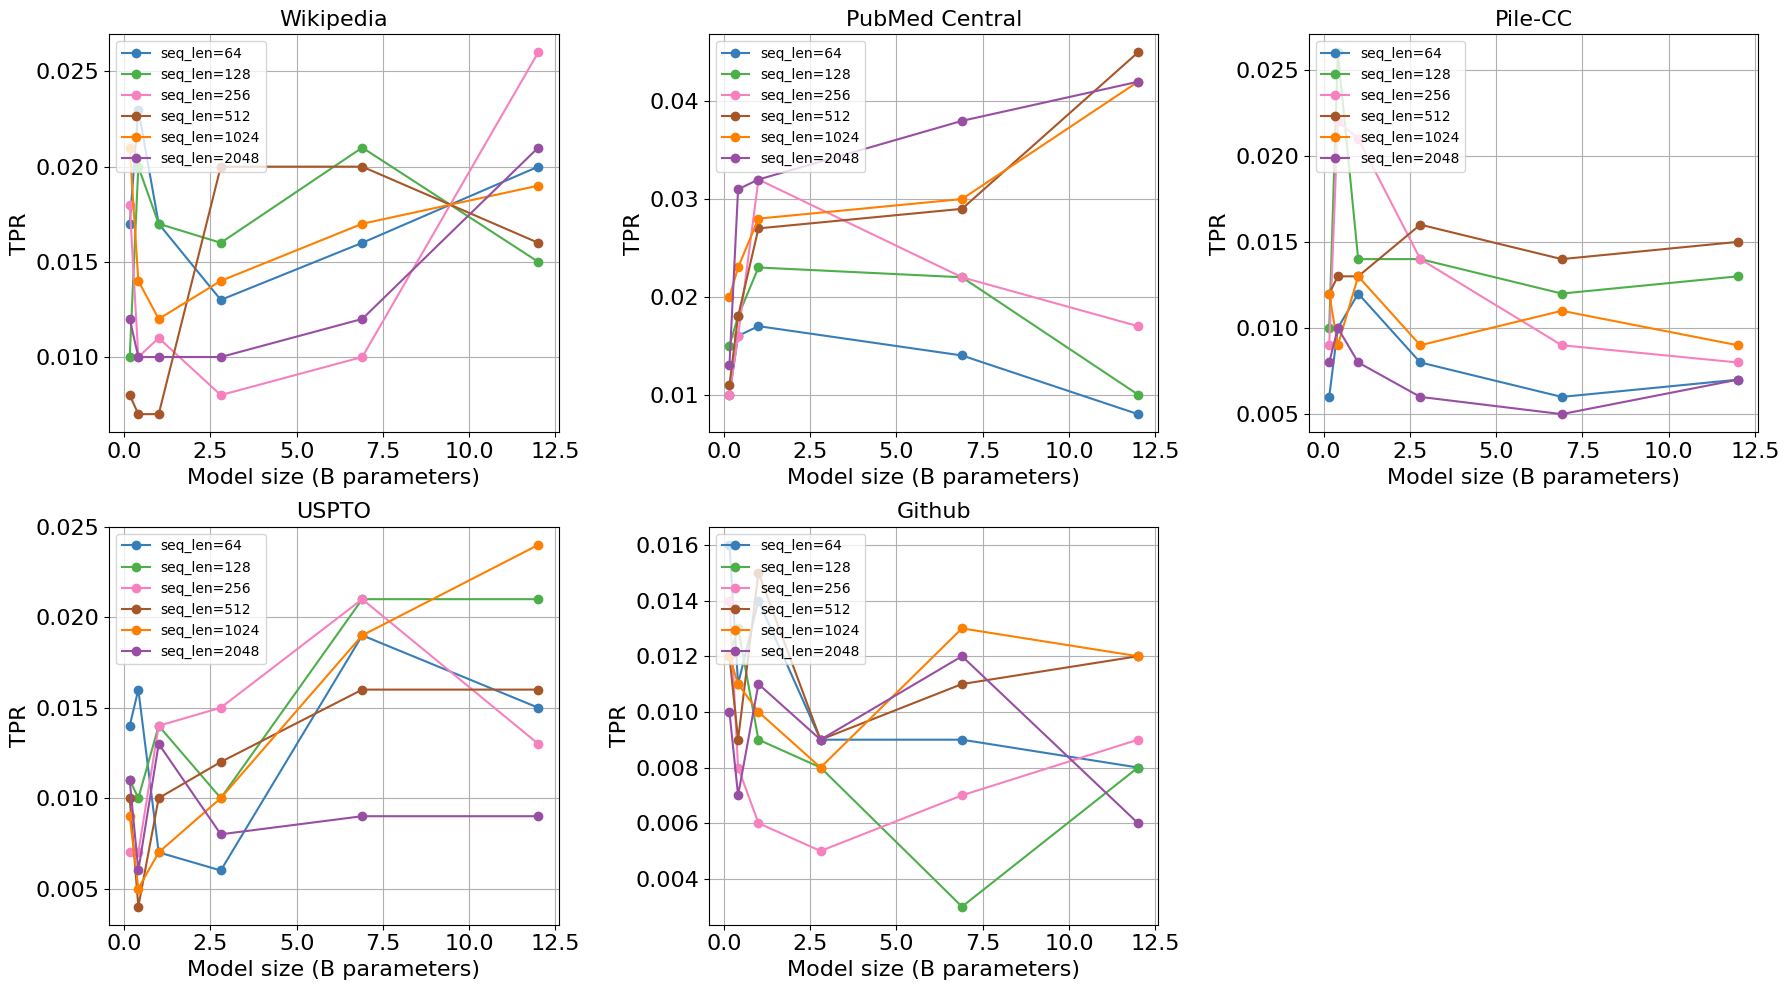

In [21]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltmean', 'TPR')

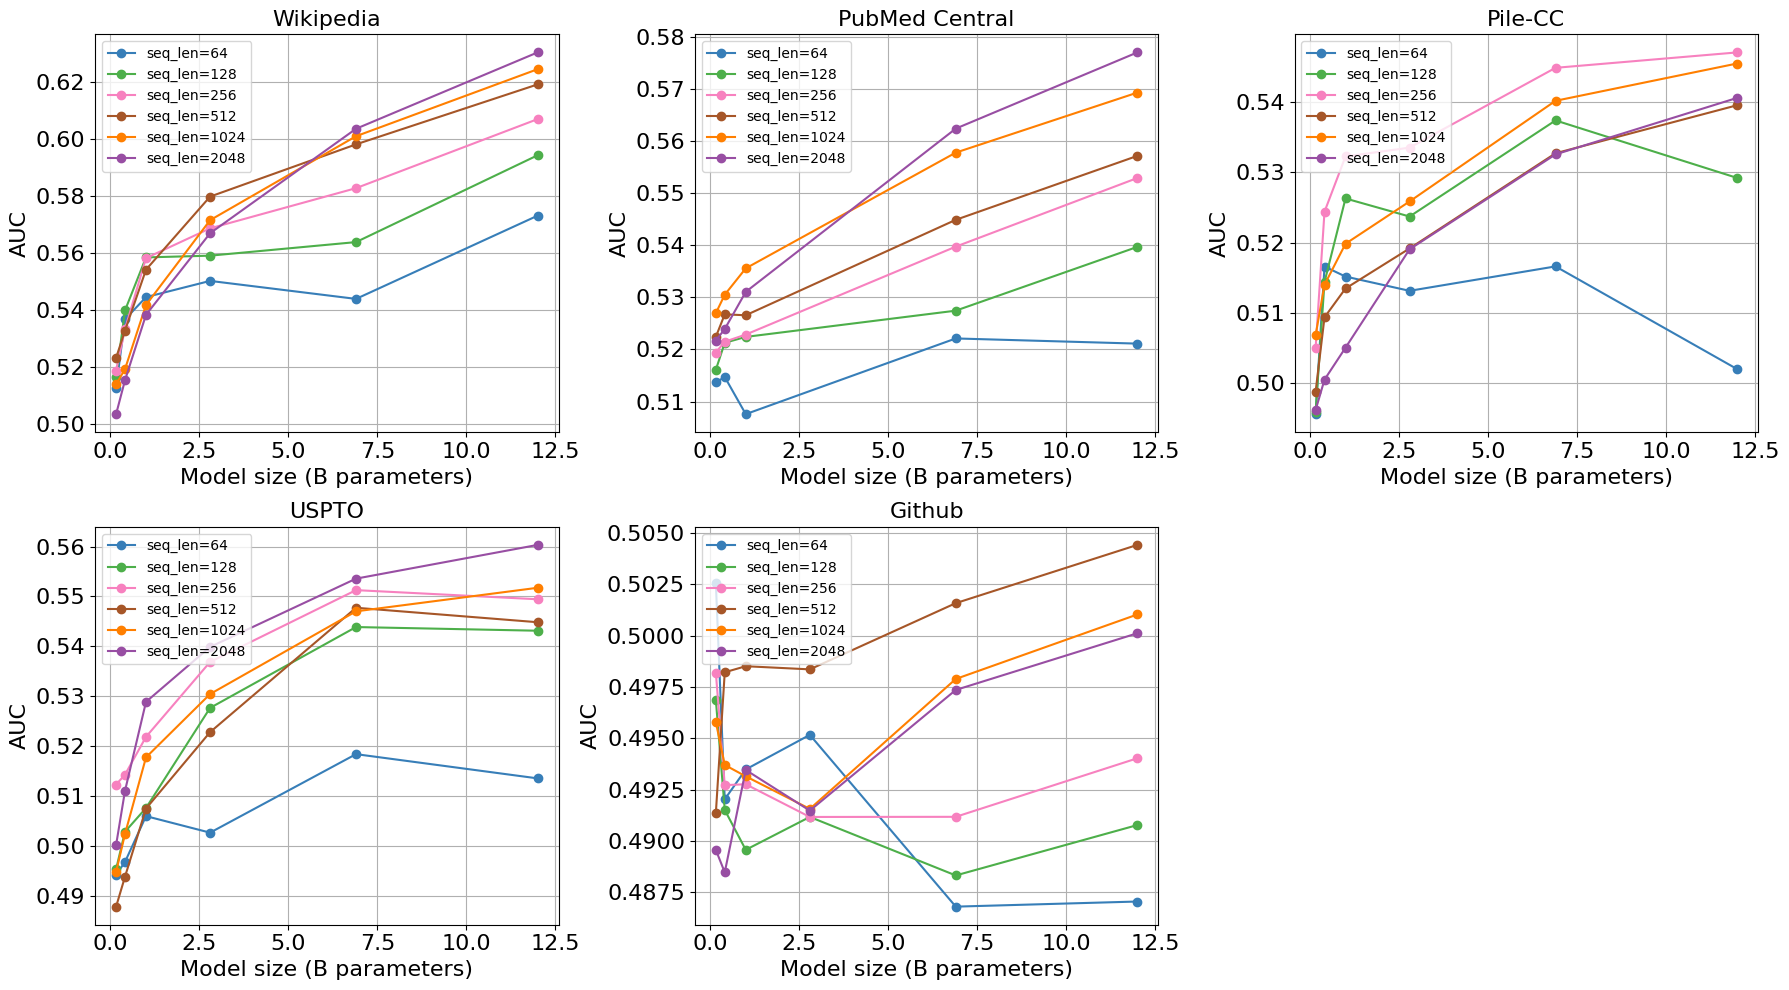

In [22]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltslope')

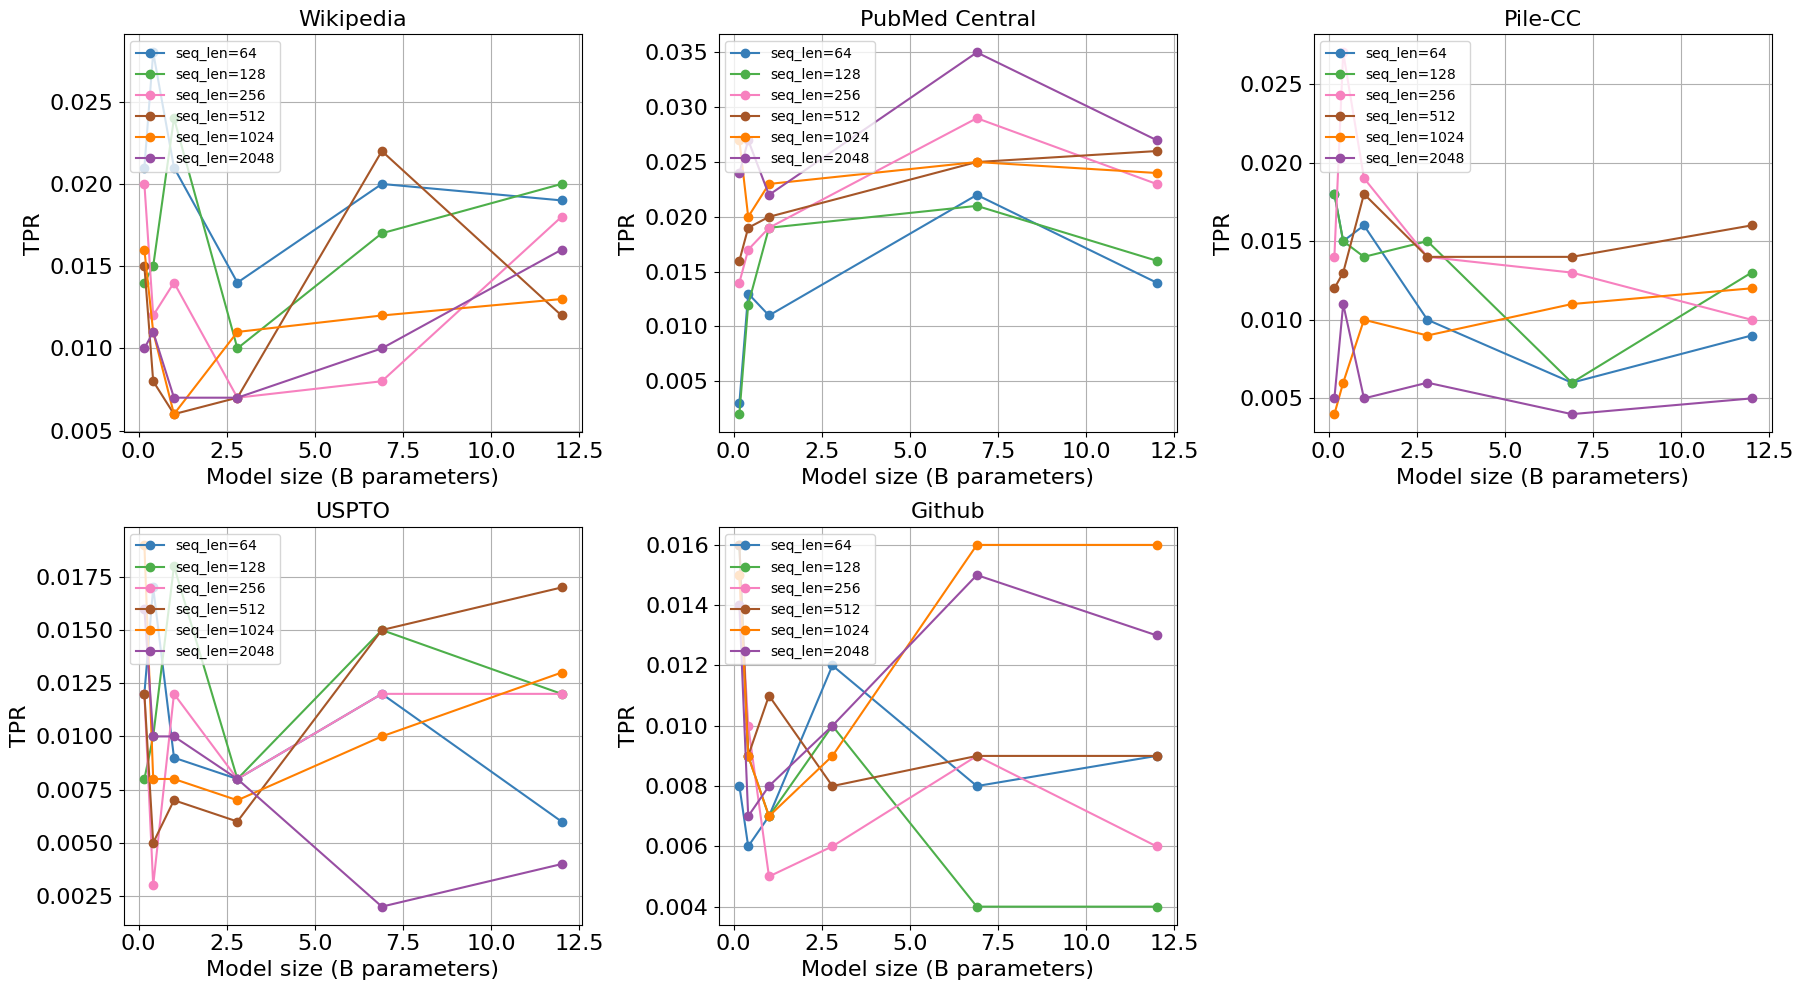

In [23]:
plot_mia_across_model_sizes_norm_loss_traces(combined_norm_results, 'ltslope', 'TPR')